# Collection of information about Dataset AirBnB Seattle.

### Question of interest:
- Can you describe the vibe of each Seattle neighborhood using listing descriptions?
- Which neighborhood is the most expensive?
- What are the busiest times of the year to visit Seattle? By how much do prices spike?

### In the same order I'll investigating the before questions, and doing plots if is necessary.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from zipfile import ZipFile
import random
%matplotlib inline

### I'll start with creating the 3 data frames, extracting the zip files, viewing the data sets and understanding the features and all the information the files have.

In [2]:
#Extracting the archive.zip, this folder contain the 3 csv files.
#with ZipFile('archive.zip', 'r') as zip:
    #zip.extractall('datasets')

In [3]:
#Saving the csv files into the data frames.
review_df = pd.read_csv('datasets/reviews.csv')
calendar_df = pd.read_csv('datasets/calendar.csv')
listings_df = pd.read_csv('datasets/listings.csv')

In [4]:
review_df.head()
#review_df.info()
#review_df.describe()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [5]:
calendar_df.head()
#calendar_df.info()
#calendar_df.describe()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [6]:
listings_df.head()
#listings_df.info()
#listings_df.describe()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


# Investigating NaN values. 

I'll create a variable that contains the columns that have NaN values, to use this when I need to investigate a specific column, I will also create another variable that contains the columns that exceed 25% of NaN values and I will eliminate the columns that contain more than 75% of NaN values.

I'll only clean and process the columns that I will need in the project to solve the questions, so I will not waste time cleaning columns that are not important to answer my questions.

In [7]:
all_nulls_col = listings_df[listings_df.columns[listings_df.isnull().sum() > 0]]
#all_nulls_col.info()

In [8]:
listings_nulls_col_25 = listings_df[listings_df.columns[listings_df.isnull().sum()/listings_df.shape[0] > 0.25]]

#listings_nulls_col_25.info()

# More 75%: 'square_feet', 'license' 
# More 50%: 'monthly_price', 'security_deposit'
# More 40%: 'weekly_price', 'notes'
# More 25%: 'neighborhood_overview', 'cleaning_fee'

In [9]:
#Dropping this columns because have more than 75% of NaN values.
listings_df = listings_df.drop(['square_feet', 'license'], axis=1)

# Question 1:

### Can you describe the vibe of each Seattle neighborhood using listing descriptions?

To solve this question I will use listings_df, the 'review_scores_location' column that contains the scores of all the reviews that have been given to the different neighborhoods in Seattle, the 'neighbourhood_group_cleansed' column to see the different neighborhoods that exist and know the mean scores the each one of them. 

In [10]:
#Filling the NaN values in the 'review_scores_location' with the mean().
listings_df['review_scores_location'] = listings_df['review_scores_location'].fillna(listings_df['review_scores_location'].mean())

#And changing the values to int, using df[column].astype(type).
listings_df['review_scores_location'] = listings_df['review_scores_location'].astype(int)

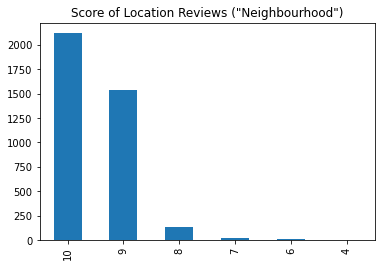

In [11]:
#Viewing the cantity of each value.
(listings_df['review_scores_location'].value_counts()).plot(kind='bar');
plt.title('Score of Location Reviews ("Neighbourhood")');

In [12]:
listings_df['review_scores_location'].value_counts()

10    2122
9     1539
8      129
7       19
6        8
4        1
Name: review_scores_location, dtype: int64

### If we see the scores that have been awarded, we only have one bad review, which was given a score of 4, and 8 reviews that were given a score of 6, although I will have to see one by one if this score is bad or good.

In [13]:
#Looking the mean scores for each neighborhood
mean_score_neighborhood = listings_df.groupby('neighbourhood_group_cleansed').mean()['review_scores_location'].sort_values().astype(int)

In [14]:
#The firt 40 neighbourhoods, with their mean score review.
mean_score_neighborhood

neighbourhood_group_cleansed
Rainier Valley         9
Beacon Hill            9
Interbay               9
Delridge               9
University District    9
Lake City              9
Seward Park            9
Northgate              9
Cascade                9
Central Area           9
Magnolia               9
Other neighborhoods    9
West Seattle           9
Queen Anne             9
Ballard                9
Downtown               9
Capitol Hill           9
Name: review_scores_location, dtype: int64

In [15]:
#The review with the value 4 as score.
list(listings_df['neighborhood_overview'][listings_df['review_scores_location'] == 4])

["It is located in the bustling and vibrant University district. A rare 100 walk score. It is within five minutes' walking distance to the University of Washington. You will have access to a diverse array of restaurants, shops and activities."]

### Investigating the bad review:

The review is not totally good, but despite the fact that it is the only review with a score of 4, it is right with its review, it is talking about the University District, and investigating the other comments about this district, they speak more or less of the same with the only difference is that this user is bothered by what others are not, living near the University is an advantage for others, but for this user it is the opposite, the District is not bad, it has a mean score of 9, and most of reviews speak highly of this neighborhood.

The user had to choose a place according to their tastes and needs to stay.

### Answer

As we can see, all the neighborhoods in Seattle have good scores, and on average they do not go below 9.

In total there are 8 ratings out of 6, and when I read them I realized that they spoke well of the neighborhood, and there is 1 rating out of 4, which has already been investigated and explained.

The other reviews are good, which indicates that the vibe in the neighborhoods of Seattle is good, and that you should choose well where to stay, according to your tolerance and comfort.

# Question 2:

### Which neighborhood is the most expensive?

In [16]:
def price_to_float(df, column):
    df[column] = df[column].str.replace("[$,]","", regex=True).astype(float)
    
price_to_float(listings_df, 'price')

In [17]:
describe = listings_df['price'].describe()

In [18]:
#The neighborhood with the cheapest price 
print("The Neighborhood with the cheapest price is: {}".format(list(listings_df['neighbourhood'][listings_df['price'] == describe['min']])))

#The neighborhood with the most expensive price
print("\nThe Neighborhood with the most expensive price is: {}".format(list(listings_df['neighbourhood'][listings_df['price'] == describe['max']])))

The Neighborhood with the cheapest price is: ['Queen Anne']

The Neighborhood with the most expensive price is: ['Ravenna']


## Comparing 4 different possible type prices by neighborhoods: Max Price, Min Price, Mean Price, and Sum Price.

In [19]:
def price_neighborhood():
    mean_v = pd.DataFrame(listings_df.groupby('neighbourhood_group_cleansed').mean()['price'].sort_values()).reset_index()
    max_v = pd.DataFrame(listings_df.groupby('neighbourhood_group_cleansed').max()['price'].sort_values()).reset_index()
    min_v = pd.DataFrame(listings_df.groupby('neighbourhood_group_cleansed').min()['price'].sort_values()).reset_index()
    sum_v = pd.DataFrame(listings_df.groupby('neighbourhood_group_cleansed').sum()['price'].sort_values()).reset_index()
    return mean_v, max_v, min_v, sum_v

In [20]:
mean_df, max_df, min_df, sum_df = price_neighborhood()

/tmp/ipykernel_10417/3470036678.py:3: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  max_v = pd.DataFrame(listings_df.groupby('neighbourhood_group_cleansed').max()['price'].sort_values()).reset_index()
/tmp/ipykernel_10417/3470036678.py:4: FutureWarning: Dropping invalid columns in DataFrameGroupBy.min is deprecated. In a future version, a TypeError will be raised. Before calling .min, select only columns which should be valid for the function.
  min_v = pd.DataFrame(listings_df.groupby('neighbourhood_group_cleansed').min()['price'].sort_values()).reset_index()


### Starting with the "Mean Price", viewing the data frame with the Neighborhoods/Prices, and the plot.

In [21]:
mean_df

,neighbourhood_group_cleansed,price
0,Delridge,83.278481
1,Northgate,88.550000
2,Rainier Valley,91.899371
3,Lake City,92.671642
4,University District,93.639344
5,Beacon Hill,94.669492
6,Seward Park,108.477273
7,Interbay,109.727273
8,Other neighborhoods,119.968514
9,Ballard,124.682609


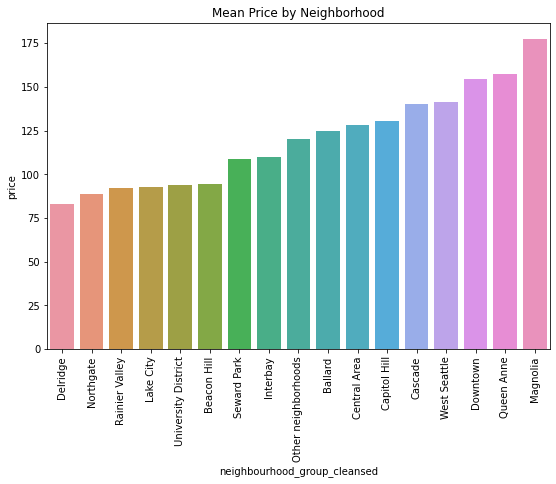

In [22]:
plt.figure(figsize=(9,6))
sns.barplot(x='neighbourhood_group_cleansed', y='price', data=mean_df)
plt.xticks(rotation=90)
plt.title('Mean Price by Neighborhood')
plt.show()

### "Minimum Price", viewing the data frame with the Neighborhoods/Prices, and the plot.

In [23]:
min_df

,neighbourhood_group_cleansed,price
0,Queen Anne,20.0
1,Capitol Hill,22.0
2,Ballard,25.0
3,Rainier Valley,25.0
4,Other neighborhoods,25.0
5,University District,28.0
6,Northgate,30.0
7,Magnolia,30.0
8,West Seattle,30.0
9,Beacon Hill,30.0


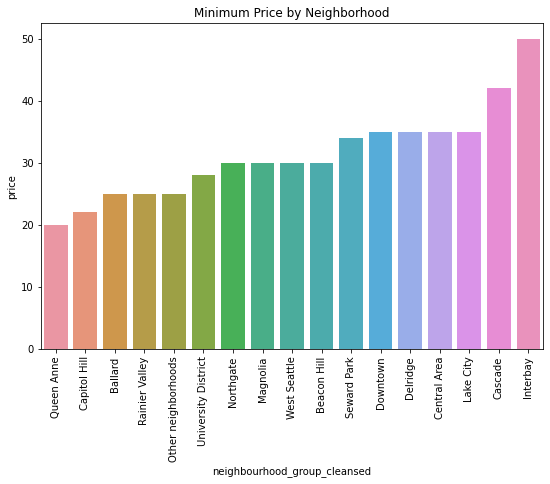

In [24]:
plt.figure(figsize=(9,6))
sns.barplot(x='neighbourhood_group_cleansed', y='price', data=min_df)
plt.xticks(rotation=90)
plt.title('Minimum Price by Neighborhood')
plt.show()

### "Maximum Price", viewing the data frame with the Neighborhoods/Prices, and the plot.

In [25]:
max_df

,neighbourhood_group_cleansed,price
0,Northgate,200.0
1,Interbay,250.0
2,Lake City,252.0
3,Rainier Valley,300.0
4,Delridge,300.0
5,University District,350.0
6,Seward Park,375.0
7,Beacon Hill,399.0
8,Ballard,475.0
9,West Seattle,495.0


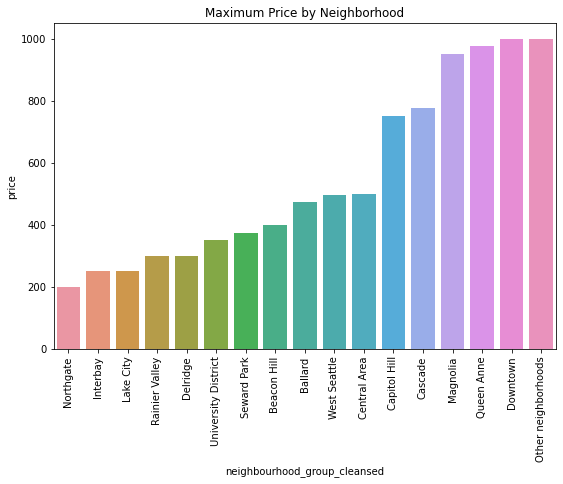

In [26]:
plt.figure(figsize=(9,6))
sns.barplot(x='neighbourhood_group_cleansed', y='price', data=max_df)
plt.xticks(rotation=90)
plt.title('Maximum Price by Neighborhood')
plt.show()

### "Sum Price", viewing the data frame with the Neighborhoods/Prices, and the plot.

This contain the sum of all the prices by neighborhoods. 
And other neighborhoods contains several neighborhoods, I'll remove it and compare those neighborhoods in another plot.

In [27]:
sum_df = sum_df[:-1]
sum_df

,neighbourhood_group_cleansed,price
0,Interbay,1207.0
1,Seward Park,4773.0
2,Lake City,6209.0
3,Delridge,6579.0
4,Northgate,7084.0
5,Magnolia,10838.0
6,Beacon Hill,11171.0
7,University District,11424.0
8,Cascade,12469.0
9,Rainier Valley,14612.0


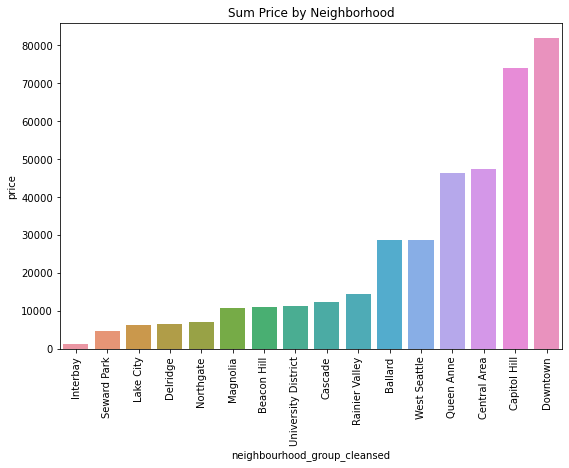

In [28]:
plt.figure(figsize=(9,6))
sns.barplot(x='neighbourhood_group_cleansed', y='price', data=sum_df)
plt.xticks(rotation=90)
plt.title('Sum Price by Neighborhood')
plt.show()

In [29]:
others_neighborhoods = listings_df[listings_df['neighbourhood_group_cleansed'] == 'Other neighborhoods']

In [30]:
others_neighborhoods['neighbourhood']

280     Wallingford
281     Wallingford
282         Fremont
283     Wallingford
284     Wallingford
           ...     
3809        Fremont
3810        Fremont
3811        Fremont
3812        Fremont
3813        Fremont
Name: neighbourhood, Length: 794, dtype: object

In [31]:
other_n_df = pd.DataFrame(others_neighborhoods.groupby('neighbourhood').sum()['price'].sort_values()).reset_index()

In [32]:
other_n_df

,neighbourhood,price
0,Maple Leaf,125.0
1,North Admiral,130.0
2,International District,150.0
3,South Park,205.0
4,University District,290.0
5,Georgetown,539.0
6,Industrial District,735.0
7,View Ridge,863.0
8,Ballard,908.0
9,Laurelhurst,984.0


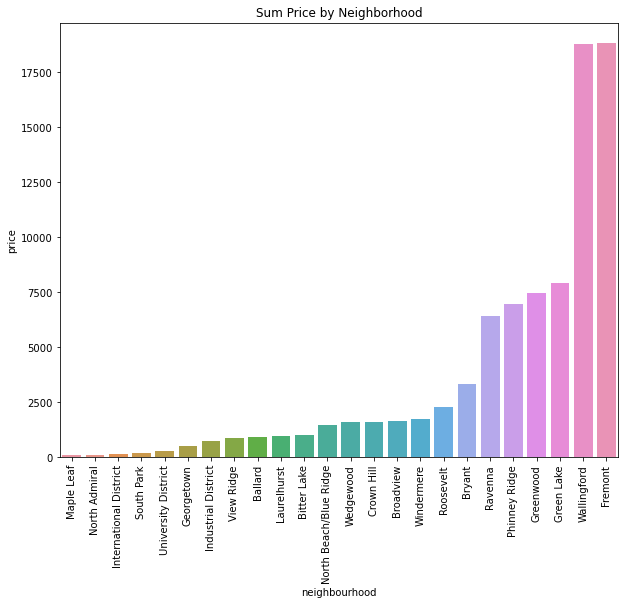

In [33]:
plt.figure(figsize=(10,8))
sns.barplot(x='neighbourhood', y='price', data=other_n_df)
plt.xticks(rotation=90)
plt.title('Sum Price by Neighborhood')
plt.show()

# Question 3:

### What are the busiest times of the year to visit Seattle? By how much do prices spike?

In [34]:
#Convert available values to [0,1], 0 for the value 't' this mean that is available.
#And 1 for the value 'f' mean is not available.
calendar_df['available'] = calendar_df['available'].replace('t', 0)
calendar_df['available'] = calendar_df['available'].replace('f', 1)

In [35]:
#Convert the column price to float and remove the symbols '$' and ','
calendar_df['price'] = calendar_df['price'].str.replace("[$,]","", regex=True).astype(float)

In [36]:
#Convert the column date to format datetime.
calendar_df['date'] = calendar_df['date'].str.replace("-", "")
calendar_df['date'] = pd.to_datetime(calendar_df['date'], format='%Y%m%d')

## NaN Values

#### Replacing the NaN values in price, by listing_id, it is the best way, since they vary between listing_id.

In [37]:
#Filling the NaN values with the mean of each listing_id.
for lst_id in calendar_df['listing_id'].unique():
    calendar_df['price'][calendar_df['listing_id'] == lst_id] = calendar_df['price'][calendar_df['listing_id'] == lst_id].fillna(round(calendar_df['price'][calendar_df['listing_id'] == lst_id].mean(),1))

/tmp/ipykernel_10417/3126268591.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calendar_df['price'][calendar_df['listing_id'] == lst_id] = calendar_df['price'][calendar_df['listing_id'] == lst_id].fillna(round(calendar_df['price'][calendar_df['listing_id'] == lst_id].mean(),1))


In [38]:
#And then filling the remaining nan values with the general mean.
calendar_df['price'].fillna(calendar_df['price'].mean(), inplace=True)

In [39]:
calendar_df['month'] = calendar_df['date'].dt.month

In [40]:
#Creating groupby with the months
date_group = calendar_df.groupby('month').sum()['available'].reset_index()
price_group = calendar_df.groupby('month').mean()['price'].reset_index()

In [41]:
date_group

,month,available
0,1,49603
1,2,37401
2,3,34420
3,4,38503
4,5,38387
5,6,37296
6,7,44136
7,8,42011
8,9,37294
9,10,35920


In [42]:
price_group

,month,price
0,1,128.344186
1,2,128.666471
2,3,131.549468
3,4,133.789809
4,5,136.693894
5,6,142.366536
6,7,143.388794
7,8,142.745094
8,9,138.189746
9,10,134.421418


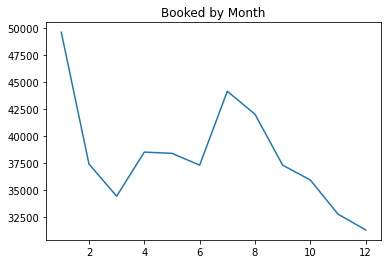

In [43]:
plt.plot(date_group['month'], date_group['available'])
plt.title('Booked by Month')
plt.show()

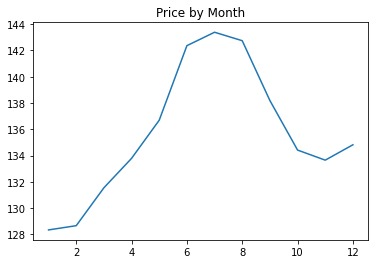

In [44]:
plt.plot(price_group['month'], price_group['price'])
plt.title('Price by Month')
plt.show()

### Answer

With the above graphs we can see that the months in which Seattle is most visited are: January, and between July and August, I think the latter for 4th July since it is a very symbolic date and where it is celebrated a lot.

Regarding prices, they also rise extraordinarily in the months of June, July, and August. Visualizing with averages per month, we see that they rise up to 15% more, from the lowest average price. Reaching an average of 143.00 dollars per month, when the lowest average price per month is 128.00 dollars and it is for this reason that the month of January in the previous graph also has a large number of visits, because that is when the prices are lower.